# Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

**Instructions**

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

**BONUS:** Try regular over and undersampling

https://github.com/NicolasVollmer/lab-imbalanced-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
churn = pd.read_csv("files_for_lab/customer_churn.csv")
print(churn.shape)
churn.head(10)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Originally, I must have skipped that I am only to calculate using the cols 'tenure','SeniorCitizen','MonthlyCharges','Churn' and processed all the data... Talk about making things hard on myself. Revised workflow below

In [4]:
# keeping only the required cols
churn = churn[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
display(churn.head(1))

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No


In [5]:
churn.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
Churn             0
dtype: int64

want to check value counts, but with these many columns, I programmed a quick loop to do it for me, though I did notice that mislabelled the dtype, so asking for that separately

In [6]:
for col in churn.columns:
    print(churn[col].value_counts(), '''
    ''')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 
    
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
    
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64 
    
No     5174
Yes    1869
Name: Churn, dtype: int64 
    


In [7]:
churn.dtypes


tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

### cleaning yes/no column

In [8]:
# commented out all the code cells from my previous cleanup workflow that processed the whole dataset

# nointservice = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# binary = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [8]:
# churn['MultipleLines'] = np.where(churn['MultipleLines'].isin(['No phone service']), 'No', churn['MultipleLines'])

In [20]:
# churn['MultipleLines'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
# for col in nointservice:
#     churn[col] = np.where(churn[col].isin(['No internet service']), 'No', churn[col])

In [9]:
churn['Churn'] = churn['Churn'].map({'Yes':1 ,'No':0})

In [10]:
churn['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [11]:
churn.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn               int64
dtype: object

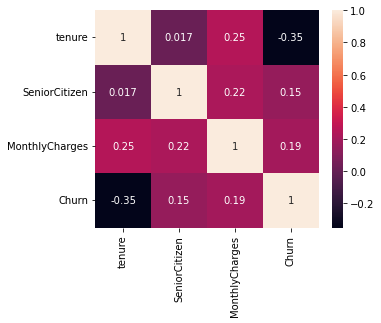

In [12]:
correlations_matrix = churn.corr()
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Xy + train/test Split and Scaling

In [13]:
X = churn.drop('Churn',axis = 1)
y = churn['Churn']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# X_train_categorical = X_train.select_dtypes(include = object)
# X_train_cat = pd.get_dummies(X_train_categorical, 
#                              columns=['type', 'operation', 'k_symbol', 'duration'],
#                              drop_first=True)
# X_train_cat.head()

In [16]:
transformer = MinMaxScaler().fit(X_train)

def min_max(X):
    return pd.DataFrame(transformer.transform(X), columns=X.columns)

In [17]:
# scaling my X train and test
X_train = min_max(X_train)
X_test = min_max(X_test)

### Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [20]:
regression = LogisticRegression(random_state=0, solver='lbfgs')
regression.fit(X_train, y_train)
pred = regression.predict(X_test)

In [25]:
# checking results

print('Logistic regression Model: ',round(regression.score(X_test, y_test)*100,2),'%')
print("precision: ",precision_score(y_test,pred))
print("recall: ", recall_score(y_test,pred))
print("f1: ", f1_score(y_test,pred))

confusion_matrix(y_test,pred)

Logistic regression Model:  78.25 %
precision:  0.6176470588235294
recall:  0.4535637149028078
f1:  0.5230386052303861


array([[1168,  130],
       [ 253,  210]])

### Remarks
**Even a simple model will give us more than 70% accuracy. Why?**
I believe it comes down to Churn being a simple yes/no column with the majority of values (more than 70%) being 0 for 'no'. Even if the model where to predict only no for an answer it would score over 70%. So accuracy is a poor metric here to properly gauge the effectiveness of our model. 

### SMOTE coming up

In [26]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=100, k_neighbors=3) # basic neighbour count of 3
X_Smote,y_Smote = sm.fit_resample(X_train,y_train)

In [35]:
regression.fit(X_Smote, y_Smote)
pred = regression.predict(X_test)

print('Logistic regression Model: ',round(regression.score(X_test, y_test)*100,2),'%')
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))
confusion_matrix(y_test,pred)

Logistic regression Model:  72.12 %
precision:  0.47982708933717577
recall:  0.7192224622030238
f1:  0.5756266205704408


array([[937, 361],
       [130, 333]])

### Remarks
**Is it there any improvement?**
Smote has actually worsened our overall model score, precision and F1, though recall scored markedly better using Smote. Also the confusion matrix has markedly different scores, though not what I would consider an improvement. Perhaps under or oversampling might yield better results, but with imbalanced data we probably will not get an ideal result anyways.